In [1]:
#import libraries

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# loading the json file

df = pd.read_json('xlsxTojson.json')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,,ILX,COMPACT,2,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
#checking missing value

print((df == "").sum())

Make                                1
Model                               0
Vehicle Class                       0
Engine Size(L)                      1
Cylinders                           2
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    1
Fuel Consumption Hwy (L/100 km)     4
Fuel Consumption Comb (L/100 km)    2
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [4]:
#remove rows with missing values

df.replace("", np.nan, inplace=True)
df_cleaned = df.dropna()
print((df_cleaned == "").sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [5]:
#standardize column names
df_cleaned.columns = (
    df.columns.str.strip()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
    .str.lower()
)

df_cleaned = df_cleaned.rename(columns={
    'engine_sizel': 'engine_size_l',
    'co2_emissionsg/km': 'co2_emissions_g_km'})

In [6]:
df_cleaned

,make,model,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,fuel_consumption_city_l/100_km,fuel_consumption_hwy_l/100_km,fuel_consumption_comb_l/100_km,fuel_consumption_comb_mpg,co2_emissions_g_km
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6,5.8,5.9,48,136
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2,4,AS8,Z,11.2,8.3,9.9,29,232


In [7]:
# Ensure data types are consistent
df_cleaned['engine_size_l'] = pd.to_numeric(df_cleaned['engine_size_l'], errors='coerce')
df_cleaned['cylinders'] = pd.to_numeric(df_cleaned['cylinders'], errors='coerce')
df_cleaned['fuel_consumption_city_l/100_km'] = pd.to_numeric(df_cleaned['fuel_consumption_city_l/100_km'], errors='coerce')
df_cleaned['fuel_consumption_hwy_l/100_km'] = pd.to_numeric(df_cleaned['fuel_consumption_hwy_l/100_km'], errors='coerce')
df_cleaned['fuel_consumption_comb_l/100_km'] = pd.to_numeric(df_cleaned['fuel_consumption_comb_l/100_km'], errors='coerce')
df_cleaned['fuel_consumption_comb_mpg'] = pd.to_numeric(df_cleaned['fuel_consumption_comb_mpg'], errors='coerce')
df_cleaned['co2_emissions_g_km'] = pd.to_numeric(df_cleaned['co2_emissions_g_km'], errors='coerce')

In [8]:
#save df_cleaned as final.json file

df_cleaned.to_json('final.json')

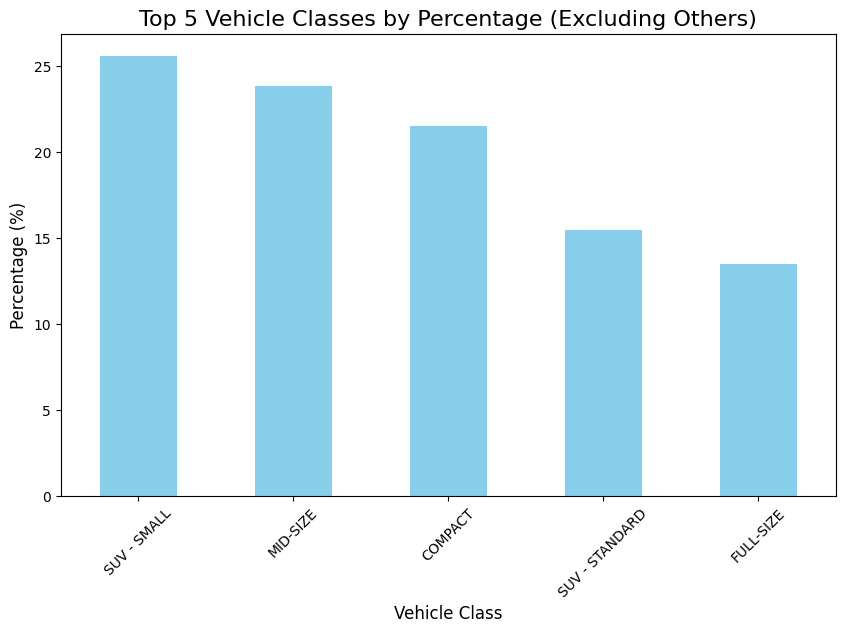

In [13]:
##Visualization##

# Normalize the top 5 vehicle classes to make their percentages sum to 100%
top_5_vehicle_classes = vehicle_class_counts.head(5)
normalized_top_5 = (top_5_vehicle_classes / top_5_vehicle_classes.sum()) * 100

# Create a bar chart for the normalized top 5 vehicle classes
plt.figure(figsize=(10, 6))
normalized_top_5.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Add chart title and labels
plt.title('Top 5 Vehicle Classes by Percentage (Excluding Others)', fontsize=16)
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#outputing the csv file for piktochart

normalized_top_5.to_csv('top_5_vehicle_classes_percentage.csv', header=True)


In [15]:
# Calculate the total CO2 emissions by vehicle class
co2_by_vehicle_class = df_cleaned.groupby('vehicle_class')['co2_emissions_g_km'].sum()

# Identify the top contributor
top_contributor = co2_by_vehicle_class.sort_values(ascending=False).head(1)

# Display the result
top_contributor


vehicle_class
SUV - SMALL    286628
Name: co2_emissions_g_km, dtype: int64

In [18]:
# Calculate total CO2 emissions by vehicle class
co2_by_vehicle_class = df_cleaned.groupby('vehicle_class')['co2_emissions_g_km'].sum()

# Sort the emissions in descending order
co2_by_vehicle_class = co2_by_vehicle_class.sort_values(ascending=False)

# Get the top 5 vehicle classes with the highest CO2 emissions
top_5_emitters = co2_by_vehicle_class.head(5)

# Display the top 5 emitters
top_5_emitters
top_5_emitters.to_csv('top_5_co2_emitters.csv', header=True)

vehicle_class
SUV - SMALL       286628
MID-SIZE          251558
SUV - STANDARD    224055
COMPACT           221250
FULL-SIZE         168259
Name: co2_emissions_g_km, dtype: int64